<a href="https://colab.research.google.com/github/Jefferson-Bueno-Da-Silva/NLP_studies/blob/main/Tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data.csv")

In [3]:
train_df

,Sentenca,Classe
0,Quero ver o cardapiio,Cardápio
1,cardapio,Cardápio
2,produtos,Cardápio
3,Qual valor do lanche,Cardápio
4,Realizar pagamento,Pagamento
...,...,...
71,Oi! Vocês têm promoções durante a semana?,Saudação
72,"Boa noite, fazem entrega pelo iFood?",Saudação
73,"Olá, qual o telefone para contato?",Saudação
74,"Oi, preciso falar com o gerente, por favor.",Saudação


<Axes: xlabel='count', ylabel='Classe'>

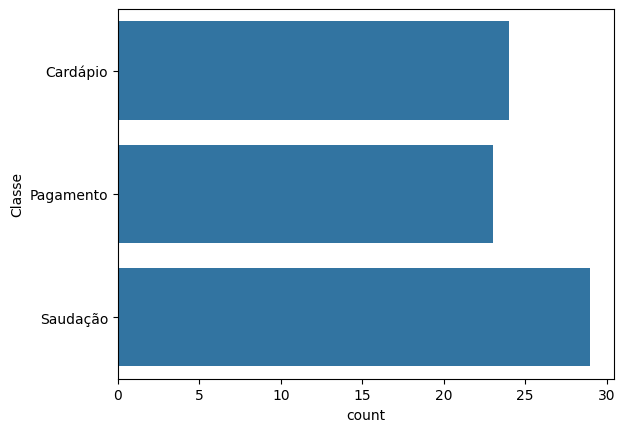

In [4]:
sns.countplot(y="Classe", data=train_df)

In [5]:
le = LabelEncoder()
y = le.fit_transform(train_df["Classe"])

In [6]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
le.classes_

array(['Cardápio', 'Pagamento', 'Saudação'], dtype=object)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train_df['Sentenca'], y, test_size=0.2, random_state=2)

In [9]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', LinearSVC())
])

In [10]:
pipeline.steps

[('vectorizer', TfidfVectorizer()), ('clf', LinearSVC())]

In [11]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', LinearSVC())])

In [12]:
pred = pipeline.predict(x_test)

In [13]:
pred

array([2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0])

In [14]:
y_test

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0])

In [15]:
accuracy_score(y_test, pred)

0.9375

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         3
           2       1.00      0.86      0.92         7

    accuracy                           0.94        16
   macro avg       0.95      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16



PREVENDO:

In [24]:
text = [
        'Quero ver o cardapiio',
        'cardapio',
        'produtos',
        'Qual valor do lanche',
        'Realizar pagamento',
        'Forma de pagamento',
        'Pix',
        'pagar com pix',
        'pagar',
        'Olá',
        'Saudações',
        'Oi tudo bem ?',
        'Tudo bom ?',
        'Bom dia',
        'Boa tarde',
        'Boa noite',
        'oi',
        'Hey'
]

prediction = pipeline.predict(text)

for i, key in enumerate(text):
  print(key,'|', le.inverse_transform(prediction)[i])

Quero ver o cardapiio | Cardápio
cardapio | Cardápio
produtos | Cardápio
Qual valor do lanche | Cardápio
Realizar pagamento | Pagamento
Forma de pagamento | Pagamento
Pix | Pagamento
pagar com pix | Pagamento
pagar | Pagamento
Olá | Saudação
Saudações | Saudação
Oi tudo bem ? | Saudação
Tudo bom ? | Saudação
Bom dia | Saudação
Boa tarde | Saudação
Boa noite | Saudação
oi | Saudação
Hey | Saudação


In [18]:
# joblib.dump(pipeline, 'TfidfModel.joblib')